###### STT:
###### Họ và tên: Vũ Cao Nguyên.
###### Buổi 5 - Bài Lab 5

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [2]:
url = 'https://raw.githubusercontent.com/datasethub/ds105/master/Model_Dataset_Lab.csv'

In [3]:
df = pd.read_csv(url)

Câu 1. Tạo dataframe (df) lưu trữ dataset tại đường dẫn trên(chọn cách đọc load từ internet). Xuất 10 samples bất kỳ. Dataset có bao nhiêu sample, số lượng bao nhiêu features.

In [4]:
df.drop(["Unnamed: 0"], axis=1, inplace= True)
df.head(10)

curb-weight  engine-size    length     width  horsepower  city-mpg  \
0         1967           90  0.755887  0.886111        68.0        31   
1         2824          136  0.848630  0.922222       115.0        18   
2         2695          121  0.896684  0.923611       110.0        21   
3         2405          122  0.828448  0.908333        88.0        25   
4         2275          110  0.799135  0.894444        56.0        34   
5         3016          171  0.881788  0.940278       161.0        19   
6         2414          122  0.843825  0.923611        92.0        27   
7         1918           90  0.755887  0.886111        68.0        37   
8         2024           92  0.754926  0.887500        76.0        30   
9         1940           92  0.720807  0.888889        76.0        30   

   highway-mpg  wheel-base  bore drive-wheels    price  
0           38        93.7  2.97          fwd   6229.0  
1           22        99.4  3.19          4wd  17450.0  
2           28        99.1  3.54          fwd  12170.0  
3           32        96.3  3.35          fwd   8189.0  
4           36        95.7  3.27          fwd   7898.0  
5           24       102.9  3.27          rwd  15998.0  
6           32       102.4  3.31          fwd   9988.0  
7           41        93.7  2.97          fwd   5572.0  
8           34        96.5  2.92          fwd   7295.0  
9           34        93.7  2.91          fwd   6529.0

In [5]:
df.sample(10)
# xuất 10 sample bất kỳ

curb-weight  engine-size    length     width  horsepower  city-mpg  \
2           2695          121  0.896684  0.923611       110.0        21   
116         2395          108  0.849592  0.900000       101.0        23   
44          3131          171  0.902451  0.923611       156.0        20   
92          2010           92  0.785199  0.888889        76.0        30   
100         2458          122  0.843825  0.923611        92.0        27   
20          3495          183  0.901009  0.976389       123.0        22   
26          2912          141  0.907256  0.933333       114.0        23   
168         2465          110  0.842864  0.905556       101.0        24   
114         2128           98  0.755887  0.886111       102.0        24   
69          2191           98  0.803940  0.886111        68.0        31   

     highway-mpg  wheel-base  bore drive-wheels    price  
2             28        99.1  3.54          fwd  12170.0  
116           29       101.2  3.50          rwd  16430.0  
44            24       104.5  3.27          rwd  15690.0  
92            34        96.5  2.91          fwd   7295.0  
100           32       102.4  3.31          fwd  11248.0  
20            25       106.7  3.58          rwd  28176.0  
26            28       104.3  3.78          rwd  12940.0  
168           28        96.5  3.15          fwd  12945.0  
114           30        93.7  3.03          fwd   7957.0  
69            38        93.7  2.97          fwd   7609.0

In [6]:
df.shape[0]
# Số lượng samples

180

In [7]:
df.columns.shape[0]
#Số lượng columns có trong dataset

11

### Câu 2 kiểm tra dữ liệu của các feature 'curb-weight','engine-size', 'length', 'width', 'horsepower', 'city-mpg', 'highway-mpg', 'wheel-base', 'bore' trong dataset. Dataset có bị khuyết giá trị nào hay không?

In [8]:
df.dtypes

curb-weight       int64
engine-size       int64
length          float64
width           float64
horsepower      float64
city-mpg          int64
highway-mpg       int64
wheel-base      float64
bore            float64
drive-wheels     object
price           float64
dtype: object

In [9]:
print('Kiểm tra các feature có giá trị nào null hay không:')
pd.DataFrame(df.isnull().sum().values, index = df.isnull().sum().index)

Kiểm tra các feature có giá trị nào null hay không:


0
curb-weight   0
engine-size   0
length        0
width         0
horsepower    0
city-mpg      0
highway-mpg   0
wheel-base    0
bore          0
drive-wheels  0
price         0

### Câu 3: Phát triển mô hình Polynomial Regression bậc 3 để dự đoán giá xe từ biến 'highway-mpg' (Tên mô hình poly)

In [10]:
y = df['price']
y

0       6229.0
1      17450.0
2      12170.0
3       8189.0
4       7898.0
        ...   
175    11549.0
176    19699.0
177     7999.0
178    16515.0
179    10898.0
Name: price, Length: 180, dtype: float64

In [11]:
x = df[['highway-mpg']]

In [12]:
pr = PolynomialFeatures(degree=3, include_bias=False)

In [13]:
x_poly = pr.fit_transform(x)

In [14]:
poly = LinearRegression()
poly.fit(x_poly, y)

LinearRegression()

In [15]:
Yhat = poly.predict(x_poly)

Text(0.5, 1.0, 'Displot')

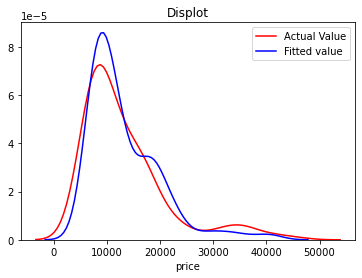

In [16]:
ax1 = sns.distplot(y, hist=False, color='r', label="Actual Value")
sns.distplot(Yhat, hist=False, color='b', label="Fitted value", ax=ax1)
plt.title("Displot")

###### Câu 4: Tính MSE và R^2 để đánh giá tập mẫu của mô hình poly băng phương pháp thủ công. Phát họa distribution plot để đánh giá mô hình.

MSE = ((y - Yhat)**2)/n

In [17]:
y = df['price']

In [18]:
Yhat = poly.predict(x_poly)

In [19]:
MSE = ((y - Yhat)**2).mean()
MSE

19355973.294509444

In [20]:
mean_squared_error(y, Yhat)
## Sử dụng model để kiểm tra

19355973.294509444

In [21]:
### R^2
y_average = y.mean()
y_average

13289.694444444445

In [22]:
MSE_y_average = ((y - y_average)**2).mean()
MSE_y_average

63661354.77885803

In [23]:
R2 = 1 - MSE/MSE_y_average
R2

0.6959541096518169

## Câu 5: Phát triển mô hình hồi quy tuyến tính đa biến để dự đoán giá xe từ biến 'curb-weight','engine-size', 'horsepower' , 'highway-mpg' 

In [24]:
x = df[[ 'curb-weight','engine-size', 'horsepower' , 'highway-mpg']]

In [25]:
y = df['price']

In [26]:
lm_5 = LinearRegression()
lm_5.fit(x, y)

LinearRegression()

In [27]:
print(lm_5.coef_)
print(lm_5.intercept_)

[ 4.92709318 82.78420228 46.31113134 29.03220964]
-15629.377814761345


   ### Câu 6: Tính MSE và R^2 để đánh giá tập mẫu của mô hình trên bằng phương pháp thủ công. Phát họa distribution plot để đánh giá mô hình.

In [28]:
y = df['price']
x = df[[ 'curb-weight','engine-size', 'horsepower' , 'highway-mpg']]

In [29]:
Yhat = lm_5.predict(x)

In [30]:
## MSE tính thủ công
MSE = ((y - Yhat)**2).mean()
MSE

12403507.581239758

In [31]:
## MSE tính bẳng model
mean_squared_error(y, Yhat)

12403507.581239758

In [32]:
y_average = y.mean()
y_average

13289.694444444445

In [33]:
MSE_y_average = ((y - y_average)**2).mean()
MSE_y_average

63661354.77885803

In [34]:
## R^2
R2 = 1- (MSE/MSE_y_average)
R2

0.8051642535047185

Text(0.5, 1.0, 'Displot')

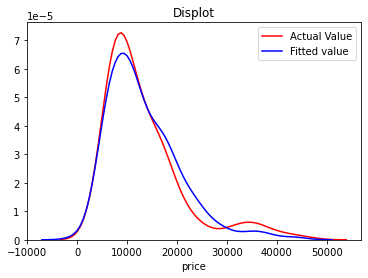

In [35]:
ax1 = sns.distplot(y, hist=False, color='r', label="Actual Value")
sns.distplot(Yhat, hist=False, color='b', label="Fitted value", ax=ax1)
plt.title("Displot")

### Câu 7: Phát triển mô hình Polynomial Regression bậc 2 để dự đoán giá xe từ biến 'horsepower','curb-weight', 'engine-size','highway-mpg'

In [36]:
x = df[['horsepower','curb-weight', 'engine-size','highway-mpg']]

In [37]:
y = df['price']

In [38]:
pr = PolynomialFeatures(degree=2, include_bias=False)

In [39]:
x_four_poly = pr.fit_transform(x)
x_four_poly.shape

(180, 14)

In [40]:
lm = LinearRegression()

In [41]:
lm.fit(x_four_poly, y)

LinearRegression()

In [42]:
lm.predict(x_four_poly).shape

(180,)

### Câu 8: Tính MSE và R^2 để đánh giá tập mẫu của mô hình trên bằng phương pháp thủ công và gọi hàm. Phát họa distribution plot để đánh giá mô hình

In [43]:
Yhat = lm.predict(x_four_poly)

In [44]:
y = df['price']

In [45]:
y_average = y.mean()

In [46]:
MSE = ((y- Yhat)**2).mean()
MSE

10132959.978562253

In [47]:
MSE_y_average = ((y - y_average)**2).mean()
MSE_y_average

63661354.77885803

In [48]:
R2 = 1 - (MSE/MSE_y_average)
R2

0.8408302805719207

## Câu 9: Thiết kế một pipeline để phát triển mô hình Polynomial Regression bậc 2 để dự đoán giá xe từ biến 'horsepower','curb-weight', 'engine-size','highway-mpg'. Trong pipeline thực hiện các công việc sau. Normalize, Transform => feature, LinearRegression để Fit tìm mô hình. Xuất mô hình vừa tìm được.

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [50]:
Input = [('scale', StandardScaler()),
        ('polynomial', PolynomialFeatures(include_bias=False)),
        ('model', LinearRegression())]

In [51]:
pipe = Pipeline(Input)

In [52]:
x = df[['horsepower','curb-weight', 'engine-size','highway-mpg']]

In [53]:
y = df['price']

In [54]:
pipe.fit(x, y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [55]:
Yhat = pipe.predict(x)
Yhat[0:4]

array([ 6069.72049753, 16278.61848822, 12481.96116031, 10348.4369573 ])

### Câu 10: Tìm khoảng giá trị được xem là vô lý trong mô hình

In [56]:
## Mô hình hồi quy đa biến 'curb-weight','engine-size', 'horsepower' , 'highway-mpg' lm_5

In [57]:
## Sử dụng phương pháp random giá trị để tìm ra các giá trị không hợp lệ.
x_test = np.array(np.arange(1000).reshape(250,4))
y_test = lm_5.predict(x_test)

In [58]:
y_test[:24]

array([-15366.87472089, -14714.65617513, -14062.43762938, -13410.21908362,
       -12758.00053787, -12105.78199211, -11453.56344636, -10801.3449006 ,
       -10149.12635485,  -9496.90780909,  -8844.68926334,  -8192.47071758,
        -7540.25217183,  -6888.03362607,  -6235.81508032,  -5583.59653456,
        -4931.37798881,  -4279.15944305,  -3626.9408973 ,  -2974.72235154,
        -2322.50380579,  -1670.28526003,  -1018.06671428,   -365.84816852])

In [59]:
x_test[:24,:]

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31],
       [32, 33, 34, 35],
       [36, 37, 38, 39],
       [40, 41, 42, 43],
       [44, 45, 46, 47],
       [48, 49, 50, 51],
       [52, 53, 54, 55],
       [56, 57, 58, 59],
       [60, 61, 62, 63],
       [64, 65, 66, 67],
       [68, 69, 70, 71],
       [72, 73, 74, 75],
       [76, 77, 78, 79],
       [80, 81, 82, 83],
       [84, 85, 86, 87],
       [88, 89, 90, 91],
       [92, 93, 94, 95]])

### Câu 11: Xếp hạng các mô hình đã phát triển các câu trên.

##### Mô hình poly:  MSE = 15844642.212048048; R^2 = 0.7511105086109467
##### Mô hình câu 5: MSE = 12403507.581239758; R^2 = 0.8051642535047185
##### Mô hình câu 7: MSE = 10132959.978562253; R^2 = 0.8408302805719207

#### Rank mô hình xếp theo R^2 cao hơn => mô hình có thể tạm tin

### Câu 12: Phát triển một mô hình nào khác tốt hơn các mô hình đã phát triển bên trên. Nếu có thì chứng minh mô hình của bạn tốt hơn.

#### Phát triển mô hình hồi quy có 1 đến 9 biến. Viết hàm kiểm tra MSE và R^2 để tìm ra mô hình có chỉ số cao để tiến hành phát triển

In [60]:
def Check_R2_v(dataframe, variables = 2):
    list_features = ['curb-weight','engine-size', 'length', 'width', 'horsepower', 'city-mpg', 'highway-mpg', 'wheel-base', 'bore' ]
    dict_name = dict()
    y = dataframe['price']
    y_average = y.mean()
    for number1 in range(9):
        while (number1 + 1) < 9:
              ## ====================Hồi quy một biến========================
            name = list()
            list_temp1 = list_features.copy()
            name.append(list_temp1[number1])
            name.append(list_temp1[number1+1])
            x = df[name]

            lm = LinearRegression()
            lm.fit(x, y)
            yhat = lm.predict(x)
            MSE = mean_squared_error(y, yhat)

            MSE_y_average = ((y - y_average)**2).mean()
            R2 = 1 - (MSE / MSE_y_average)
            strd = list_temp1[number1] + list_temp1[number1+1]
            dict_name[ strd] = R2

    return dict_name

In [61]:
def Check_R2(dataframe):
    list_features = ['curb-weight','engine-size', 'length', 'width', 'horsepower', 'city-mpg', 'highway-mpg', 'wheel-base', 'bore' ]
    dict_name = dict()
    y = dataframe['price']
    y_average = y.mean()
    for number1 in range(9):
         ## ====================Hồi quy một biến========================
        list_temp1 = list_features.copy()
        name = list_temp1[number1]
        x = df[[name]]
       
        lm = LinearRegression()
        lm.fit(x, y)
        yhat = lm.predict(x)
        MSE = mean_squared_error(y, yhat)
        
        MSE_y_average = ((y - y_average)**2).mean()
        R2 = 1 - (MSE / MSE_y_average)
        dict_name[name] = R2
            
    return dict_name

In [62]:
dict_R2 = Check_R2(df)

In [63]:
a = sorted(dict_R2.items(), key=lambda x: x[1])    
for k, v in a[::-1]:
    print(k,"\nR^2 = ", v, "\n")

engine-size 
R^2 =  0.7596584287542103 

curb-weight 
R^2 =  0.7052521923275914 

horsepower 
R^2 =  0.6527261021204291 

width 
R^2 =  0.5840854904827371 

highway-mpg 
R^2 =  0.5095276715927741 

length 
R^2 =  0.49276779886843025 

city-mpg 
R^2 =  0.47679396946612396 

wheel-base 
R^2 =  0.36276260287572804 

bore 
R^2 =  0.2772114769627062 



In [64]:
def CheckTwoVariable(df, n = 2):
    list_features = ['curb-weight','engine-size', 'length', 'width', 'horsepower', 'city-mpg', 'highway-mpg', 'wheel-base', 'bore' ]
    dict_name = dict()
    y = df['price']
    y_average = y.mean()
    for index_list1 in range(9):
        for index_list2 in range(index_list1,9):
            temp = list_features.copy()
            if index_list1 != index_list2:
                temp2 = [temp[index_list1], temp[index_list2]]
                variables = df[temp2]
                lm_variables = LinearRegression()
                lm_variables.fit(variables,df['price'] )
                yhat = lm_variables.predict(variables)
                MSE = mean_squared_error(y, yhat)
                name = temp[index_list1] + temp[index_list2]
                MSE_y_average = ((y - y_average)**2).mean()
                R2 = 1 - (MSE / MSE_y_average)
                dict_name[name] = R2
    return dict_name

In [65]:
dict_r22 = CheckTwoVariable(df, n= 2)
a = sorted(dict_r22.items(), key=lambda x: x[1])    
for k, v in a[::-1]:
    print(k,"\nR^2 = ", v, "\n")

curb-weightengine-size 
R^2 =  0.7932436538138823 

engine-sizewidth 
R^2 =  0.7902765573874925 

engine-sizecity-mpg 
R^2 =  0.7825734146802041 

engine-sizehighway-mpg 
R^2 =  0.782139752451274 

engine-sizehorsepower 
R^2 =  0.7821155304171415 

engine-sizelength 
R^2 =  0.7783512094260764 

engine-sizewheel-base 
R^2 =  0.7732555812075412 

curb-weighthorsepower 
R^2 =  0.7647474706472981 

engine-sizebore 
R^2 =  0.7620318465133159 

widthhorsepower 
R^2 =  0.7570056400881526 

horsepowerwheel-base 
R^2 =  0.747523267250731 

lengthhorsepower 
R^2 =  0.7267146859980564 

curb-weightlength 
R^2 =  0.7113102274337874 

curb-weightwidth 
R^2 =  0.7108832569812467 

curb-weightwheel-base 
R^2 =  0.7106754822374538 

curb-weightcity-mpg 
R^2 =  0.7099382484089745 

curb-weighthighway-mpg 
R^2 =  0.7080665644477688 

curb-weightbore 
R^2 =  0.7052550386965795 

horsepowerhighway-mpg 
R^2 =  0.6620354167205591 

horsepowerbore 
R^2 =  0.6609934219200381 

horsepowercity-mpg 
R^2 =  0.654

In [66]:
def CheckTwoVariable(df, n = 3):
    list_features = ['curb-weight','engine-size', 'length', 'width', 'horsepower', 'city-mpg', 'highway-mpg', 'wheel-base', 'bore' ]
    dict_name = dict()
    y = df['price']
    y_average = y.mean()
    for index_list1 in range(9):
        for index_list2 in range(index_list1+1,9):
            for index_list3 in range(index_list2+1, 9):
                temp = list_features.copy()
                temp2 = [temp[index_list1], temp[index_list2],temp[index_list3] ]
                variables = df[temp2]
                lm_variables = LinearRegression()
                lm_variables.fit(variables,df['price'] )
                yhat = lm_variables.predict(variables)
                MSE = mean_squared_error(y, yhat)
                name = temp[index_list1] +" "+ temp[index_list2] +" "+ temp[index_list3]
                MSE_y_average = ((y - y_average)**2).mean()
                R2 = 1 - (MSE / MSE_y_average)
                dict_name[name] = R2
    return dict_name

In [67]:
dict_r23 = CheckTwoVariable(df, n= 3)
a = sorted(dict_r23.items(), key=lambda x: x[1])    
for k, v in a[::-1]:
    print(k,"\nR^2 = ", v, "\n")

engine-size width horsepower 
R^2 =  0.8099266299420065 

curb-weight engine-size horsepower 
R^2 =  0.8050272314190564 

engine-size horsepower wheel-base 
R^2 =  0.804288080511649 

engine-size width city-mpg 
R^2 =  0.8008378000318495 

engine-size width highway-mpg 
R^2 =  0.7986993073386165 

engine-size length horsepower 
R^2 =  0.798506438351451 

curb-weight engine-size width 
R^2 =  0.7983351327942961 

curb-weight engine-size city-mpg 
R^2 =  0.7974376618781068 

curb-weight engine-size highway-mpg 
R^2 =  0.7959861376876213 

curb-weight engine-size bore 
R^2 =  0.7935317786704739 

curb-weight engine-size length 
R^2 =  0.7932878967673899 

curb-weight engine-size wheel-base 
R^2 =  0.7932574862348389 

engine-size city-mpg wheel-base 
R^2 =  0.7908958804856129 

engine-size length width 
R^2 =  0.7906026589327959 

engine-size width wheel-base 
R^2 =  0.790324891820391 

engine-size width bore 
R^2 =  0.7903218988567955 

engine-size length city-mpg 
R^2 =  0.7890736059678

In [68]:
def CheckTwoVariable(df, n = 4):
    list_features = ['curb-weight','engine-size', 'length', 'width', 'horsepower', 'city-mpg', 'highway-mpg', 'wheel-base', 'bore' ]
    dict_name = dict()
    y = df['price']
    y_average = y.mean()
    for index_list1 in range(9):
        for index_list2 in range(index_list1+1,9):
            for index_list3 in range(index_list2+1, 9):
                for index_list4 in range(index_list3+1, 9):
                    temp = list_features.copy()
                    temp2 = [temp[index_list1], temp[index_list2],temp[index_list3], temp[index_list4] ]
                    variables = df[temp2]
                    lm_variables = LinearRegression()
                    lm_variables.fit(variables,df['price'] )
                    yhat = lm_variables.predict(variables)
                    MSE = mean_squared_error(y, yhat)
                    name = temp[index_list1] +" "+ temp[index_list2] +" "+ temp[index_list3] +" "+ temp[index_list4]
                    MSE_y_average = ((y - y_average)**2).mean()
                    R2 = 1 - (MSE / MSE_y_average)
                    dict_name[name] = R2
    return dict_name

In [69]:
dict_r24 = CheckTwoVariable(df, n= 4)
a = sorted(dict_r24.items(), key=lambda x: x[1])    
for k, v in a[::-1]:
    print(k,"\nR^2 = ", v, "\n")

curb-weight engine-size width horsepower 
R^2 =  0.8127611898063525 

engine-size width horsepower wheel-base 
R^2 =  0.8116346682371335 

engine-size width horsepower bore 
R^2 =  0.8103847888600958 

engine-size length width horsepower 
R^2 =  0.8101281760200802 

engine-size width horsepower city-mpg 
R^2 =  0.8100467084126608 

engine-size width horsepower highway-mpg 
R^2 =  0.8099773060788329 

curb-weight engine-size horsepower wheel-base 
R^2 =  0.8081055811709054 

curb-weight engine-size horsepower bore 
R^2 =  0.8060219960920519 

curb-weight engine-size length horsepower 
R^2 =  0.8052840243987951 

curb-weight engine-size horsepower highway-mpg 
R^2 =  0.8051642535047185 

curb-weight engine-size horsepower city-mpg 
R^2 =  0.8050727188553577 

engine-size horsepower wheel-base bore 
R^2 =  0.8049634816982436 

engine-size horsepower city-mpg wheel-base 
R^2 =  0.804365390709989 

engine-size length horsepower wheel-base 
R^2 =  0.8043524914579916 

engine-size horsepower 

In [70]:
def CheckTwoVariable(df, n = 5):
    list_features = ['curb-weight','engine-size', 'length', 'width', 'horsepower', 'city-mpg', 'highway-mpg', 'wheel-base', 'bore' ]
    dict_name = dict()
    y = df['price']
    y_average = y.mean()
    for index_list1 in range(9):
        for index_list2 in range(index_list1+1,9):
            for index_list3 in range(index_list2+1, 9):
                for index_list4 in range(index_list3+1, 9):
                    for index_list5 in range(index_list4+1, 9):
                        temp = list_features.copy()
                        temp2 = [temp[index_list1], temp[index_list2],temp[index_list3], temp[index_list4], temp[index_list5] ]
                        variables = df[temp2]
                        lm_variables = LinearRegression()
                        lm_variables.fit(variables,df['price'] )
                        yhat = lm_variables.predict(variables)
                        MSE = mean_squared_error(y, yhat)
                        name = temp[index_list1] +" "+ temp[index_list2] +" "+ temp[index_list3] +" "+ temp[index_list4] +" "+ temp[index_list5]
                        MSE_y_average = ((y - y_average)**2).mean()
                        R2 = 1 - (MSE / MSE_y_average)
                        dict_name[name] = R2
    return dict_name

In [71]:
dict_r25 = CheckTwoVariable(df, n= 5)
a = sorted(dict_r25.items(), key=lambda x: x[1])    
for k, v in a[::-1]:
    print(k,"\nR^2 = ", v, "\n")

curb-weight engine-size width horsepower bore 
R^2 =  0.8139293297473877 

curb-weight engine-size length width horsepower 
R^2 =  0.8131862206713862 

curb-weight engine-size width horsepower wheel-base 
R^2 =  0.8130677160724191 

curb-weight engine-size width horsepower highway-mpg 
R^2 =  0.8130542941797334 

curb-weight engine-size width horsepower city-mpg 
R^2 =  0.812856832816127 

engine-size width horsepower wheel-base bore 
R^2 =  0.8124933318178705 

engine-size length width horsepower wheel-base 
R^2 =  0.8119186660391796 

engine-size width horsepower highway-mpg wheel-base 
R^2 =  0.8116592501071853 

engine-size width horsepower city-mpg wheel-base 
R^2 =  0.8116354922379061 

engine-size length width horsepower bore 
R^2 =  0.810827518340577 

engine-size width horsepower city-mpg bore 
R^2 =  0.8106427181636566 

engine-size width horsepower highway-mpg bore 
R^2 =  0.8105259191756558 

engine-size length width horsepower city-mpg 
R^2 =  0.8101636446321975 

engine-s

In [72]:
def CheckTwoVariable(df, n = 6):
    list_features = ['curb-weight','engine-size', 'length', 'width', 'horsepower', 'city-mpg', 'highway-mpg', 'wheel-base', 'bore' ]
    dict_name = dict()
    y = df['price']
    y_average = y.mean()
    for index_list1 in range(9):
        for index_list2 in range(index_list1+1,9):
            for index_list3 in range(index_list2+1, 9):
                for index_list4 in range(index_list3+1, 9):
                    for index_list5 in range(index_list4+1, 9):
                        for index_list6 in range(index_list5+1, 9):
                            temp = list_features.copy()
                            temp2 = [temp[index_list1], temp[index_list2],temp[index_list3], temp[index_list4], temp[index_list5],  temp[index_list6] ]
                            variables = df[temp2]
                            lm_variables = LinearRegression()
                            lm_variables.fit(variables,df['price'] )
                            yhat = lm_variables.predict(variables)
                            MSE = mean_squared_error(y, yhat)
                            name = temp[index_list1] +" "+ temp[index_list2] +" "+ temp[index_list3] +" "+ temp[index_list4] +" "+ temp[index_list5] +" "+ temp[index_list6]
                            MSE_y_average = ((y - y_average)**2).mean()
                            R2 = 1 - (MSE / MSE_y_average)
                            dict_name[name] = R2
    return dict_name

In [73]:
dict_r26 = CheckTwoVariable(df, n= 6)
a = sorted(dict_r26.items(), key=lambda x: x[1])    
for k, v in a[::-1]:
    print(k,"\nR^2 = ", v, "\n")

curb-weight engine-size width horsepower wheel-base bore 
R^2 =  0.8143453466742875 

curb-weight engine-size length width horsepower wheel-base 
R^2 =  0.8142736885042406 

curb-weight engine-size length width horsepower bore 
R^2 =  0.814136686925024 

curb-weight engine-size width horsepower highway-mpg bore 
R^2 =  0.8140924857147436 

curb-weight engine-size width horsepower city-mpg bore 
R^2 =  0.8139513327694334 

curb-weight engine-size width horsepower highway-mpg wheel-base 
R^2 =  0.813427685624315 

curb-weight engine-size length width horsepower highway-mpg 
R^2 =  0.8133952428736062 

curb-weight engine-size width horsepower city-mpg highway-mpg 
R^2 =  0.813235690984071 

curb-weight engine-size length width horsepower city-mpg 
R^2 =  0.8132150904114869 

curb-weight engine-size width horsepower city-mpg wheel-base 
R^2 =  0.8131910457363316 

engine-size length width horsepower wheel-base bore 
R^2 =  0.8126077764337041 

engine-size width horsepower city-mpg wheel-ba

In [74]:
def CheckTwoVariable(df, n = 7):
    list_features = ['curb-weight','engine-size', 'length', 'width', 'horsepower', 'city-mpg', 'highway-mpg', 'wheel-base', 'bore' ]
    dict_name = dict()
    y = df['price']
    y_average = y.mean()
    for index_list1 in range(9):
        for index_list2 in range(index_list1+1,9):
            for index_list3 in range(index_list2+1, 9):
                for index_list4 in range(index_list3+1, 9):
                    for index_list5 in range(index_list4+1, 9):
                        for index_list6 in range(index_list5+1, 9):
                            for index_list7 in range(index_list6+1, 9):
                                temp = list_features.copy()
                                temp2 = [temp[index_list1], temp[index_list2],temp[index_list3], temp[index_list4], temp[index_list5],  temp[index_list6], temp[index_list7] ]
                                variables = df[temp2]
                                lm_variables = LinearRegression()
                                lm_variables.fit(variables,df['price'] )
                                yhat = lm_variables.predict(variables)
                                MSE = mean_squared_error(y, yhat)
                                name = temp[index_list1] +" "+ temp[index_list2] +" "+ temp[index_list3] +" "+ temp[index_list4] +" "+ temp[index_list5] +" "+ temp[index_list6] +" "+ temp[index_list7]
                                MSE_y_average = ((y - y_average)**2).mean()
                                R2 = 1 - (MSE / MSE_y_average)
                                dict_name[name] = R2
    return dict_name

In [75]:
dict_r27 = CheckTwoVariable(df, n= 7)
a = sorted(dict_r27.items(), key=lambda x: x[1])    
for k, v in a[::-1]:
    print(k,"\nR^2 = ", v, "\n")

curb-weight engine-size length width horsepower wheel-base bore 
R^2 =  0.8151866369870608 

curb-weight engine-size width horsepower highway-mpg wheel-base bore 
R^2 =  0.8145609397899825 

curb-weight engine-size length width horsepower highway-mpg wheel-base 
R^2 =  0.8145181673499237 

curb-weight engine-size width horsepower city-mpg wheel-base bore 
R^2 =  0.8143810715568888 

curb-weight engine-size width horsepower city-mpg highway-mpg bore 
R^2 =  0.8143483864461918 

curb-weight engine-size length width horsepower city-mpg wheel-base 
R^2 =  0.8142880489389511 

curb-weight engine-size length width horsepower highway-mpg bore 
R^2 =  0.814262248278776 

curb-weight engine-size length width horsepower city-mpg bore 
R^2 =  0.8141402407121683 

curb-weight engine-size length width horsepower city-mpg highway-mpg 
R^2 =  0.8137277543845798 

curb-weight engine-size width horsepower city-mpg highway-mpg wheel-base 
R^2 =  0.8136307758951441 

engine-size width horsepower city-mpg